In [1]:
import pandas as pd
file_path = 'C:/Users/mihor/python-material/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3.gzip'
df = pd.read_csv(file_path, nrows=100000, low_memory=False)
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [2]:
print(df.columns.tolist())

['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_c

In [3]:
print(df['loan_status'].unique())

['Fully Paid' 'Charged Off' nan
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [4]:
print(df['loan_status'].value_counts())

loan_status
Fully Paid                                             82647
Charged Off                                            14603
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: count, dtype: int64


In [5]:
# Step 3: keep only rows with status :fully Paid" or "Charged Off"
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

#Create a new binary target column:
df['is_fully_paid'] = df['loan_status'].apply(lambda x: 1 if x== "Fully Paid" else 0)

In [6]:
df_raw = df.copy()

In [7]:
print(df_raw['int_rate'].head())

0     10.65%
1     15.27%
2     15.96%
3     13.49%
4     12.69%
Name: int_rate, dtype: object


In [8]:
df_raw['int_rate'] = df_raw['int_rate'].astype(str).str.replace('%', '').astype(float)

In [9]:
print(df.shape)
print(df['is_fully_paid'].value_counts(normalize=True))

(97250, 143)
is_fully_paid
1    0.849841
0    0.150159
Name: proportion, dtype: float64


In [10]:
# Step 1: Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'emp_title', 'emp_lenght', 'sub_grade', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'policy_code', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [11]:
print(df['loan_status'].value_counts())

loan_status
Fully Paid     82647
Charged Off    14603
Name: count, dtype: int64


In [12]:
df['term'] = df['term'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)

In [13]:
df.duplicated().sum()

0

In [14]:
# Check basic info and data type
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (97250, 114)
<class 'pandas.core.frame.DataFrame'>
Index: 97250 entries, 0 to 99999
Columns: 114 entries, loan_amnt to is_fully_paid
dtypes: float64(100), int32(1), int64(1), object(12)
memory usage: 85.0+ MB


### Exploratory Data Anylysis (Before Encoding)
The following visualizations use the original categorical and numeric features. This step is done before applying one_hot encoding to preserve readability

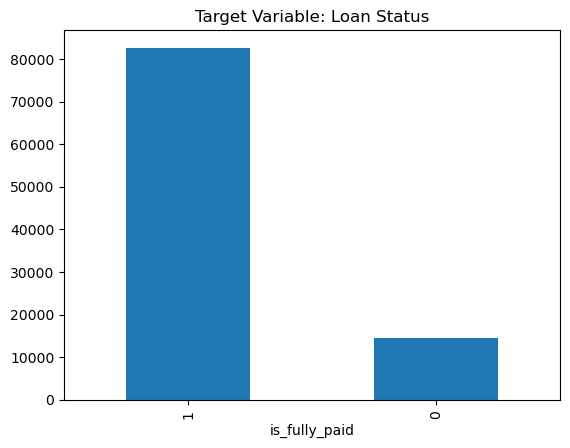

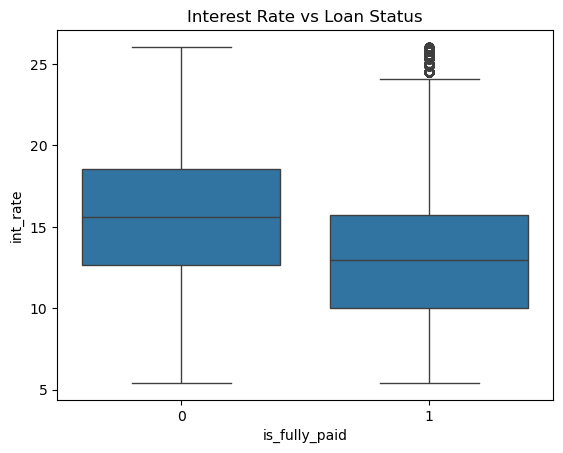

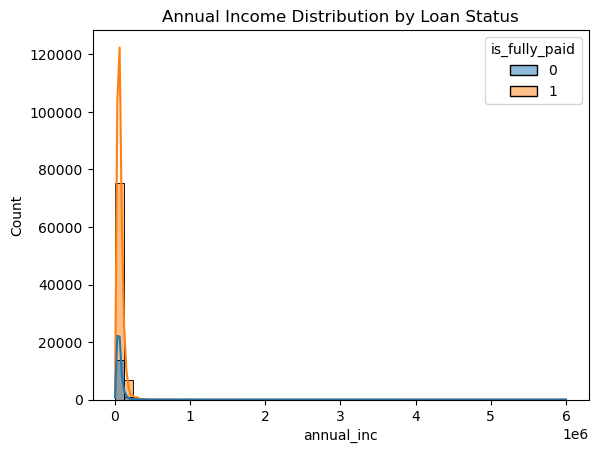

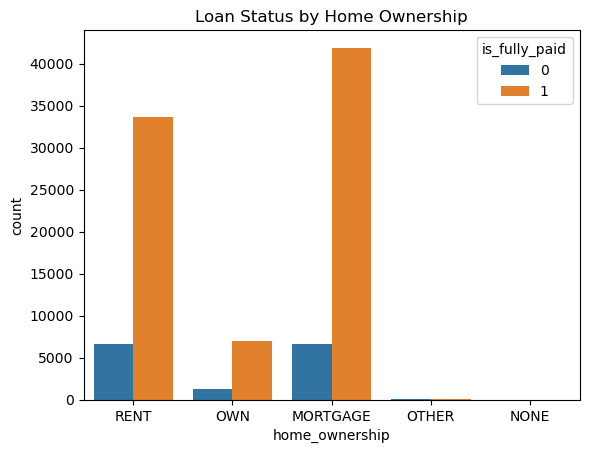

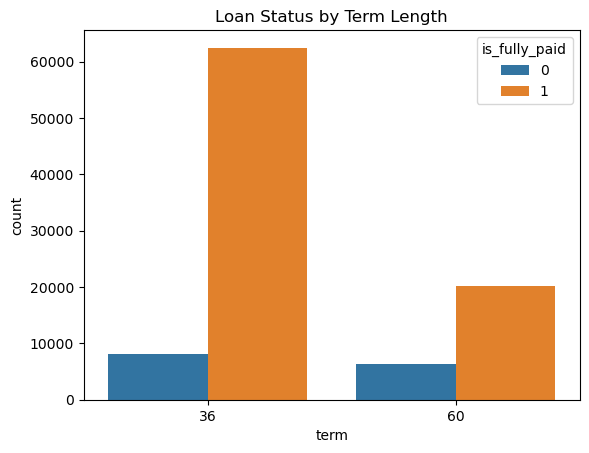

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Target Variable Distribution
df['is_fully_paid'].value_counts().plot(kind='bar', title='Target Variable: Loan Status')
plt.show()

# 2. Interest Rate vs Loan Status
sns.boxplot(x='is_fully_paid', y='int_rate', data=df_raw)
plt.title('Interest Rate vs Loan Status')
plt.show()

# 3. Annual Income Distribution
sns.histplot(data=df, x='annual_inc', hue='is_fully_paid', bins=50, kde=True)
plt.title('Annual Income Distribution by Loan Status')
plt.show()

# 4. Home Ownership vs Loan Status
sns.countplot(data=df, x='home_ownership', hue='is_fully_paid')
plt.title('Loan Status by Home Ownership')
plt.show()

# 5. Term vs Loan Status
sns.countplot(data=df, x='term', hue='is_fully_paid')
plt.title('Loan Status by Term Length')
plt.show()

In [17]:
# Step 1: Handle missing values
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
high_na_cols = missing_percent[missing_percent > 50].index
df.drop(columns=high_na_cols, inplace=True)

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Step 2: Convert data types
df['term'] = df['term'].astype(str).str.extract(r'(\d+)').astype(float)

# Step 3: Remove duplicates
df = df.drop_duplicates()

# Step 4: Handle outliers
if 'annual_inc' in df.columns:
    df = df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]

# Step 5: Clean and preprocess string columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.lower())

# Step 6: Extract features from date columns (optional)
if 'issue_d' in df.columns:
    df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
    df['issue_year'] = df['issue_d'].dt.year
    df['issue_month'] = df['issue_d'].dt.month
    df.drop(columns='issue_d', inplace=True)

# Step 7: Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Optional Step 8: Standardize numeric features (needed only for some models)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df.drop('is_fully_paid', axis=1))

## Outliers + One-Hot Encoding

In [19]:
# --- Outlier removal for annual_inc ---
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['annual_inc'] >= Q1 - 1.5 * IQR) & (df['annual_inc'] <= Q3 + 1.5 * IQR)]

# --- One-hot encoding for categorical variables ---
df = pd.get_dummies(df, drop_first=True)

### Model Training Block(Logistic Regression)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Split
X = df.drop('is_fully_paid', axis=1)
y = df['is_fully_paid']

# Step 2:Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fitnthe model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Evaluete
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\mihor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 2824     0]
 [    1 15668]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2824
           1       1.00      1.00      1.00     15669

    accuracy                           1.00     18493
   macro avg       1.00      1.00      1.00     18493
weighted avg       1.00      1.00      1.00     18493



### Model Training Block (Random Forest)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: (повторно, якщо ще не зроблено)
X = df.drop('is_fully_paid', axis=1)
y = df['is_fully_paid']

# Step 2: Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_pred_rf = rf_model.predict(X_test)

# Step 5: Evaluate
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[ 2803    21]
 [    0 15669]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2824
           1       1.00      1.00      1.00     15669

    accuracy                           1.00     18493
   macro avg       1.00      1.00      1.00     18493
weighted avg       1.00      1.00      1.00     18493



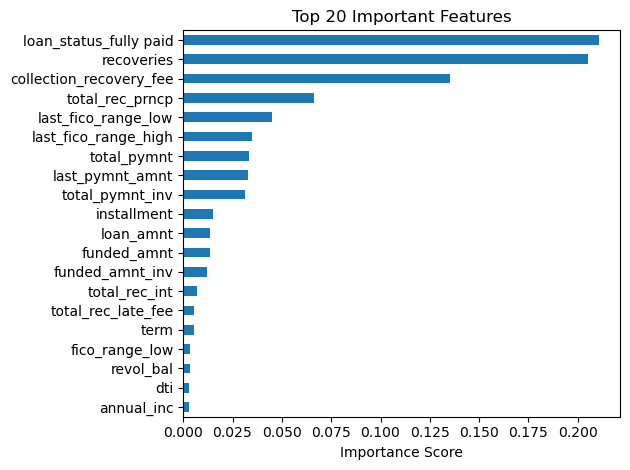

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(20)

# Plot
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

### 1. Target Variable Distribution

Shows the class balance between fully paid and charged off loans.



<Axes: title={'center': 'Target Variable: Loan Status'}, xlabel='is_fully_paid'>

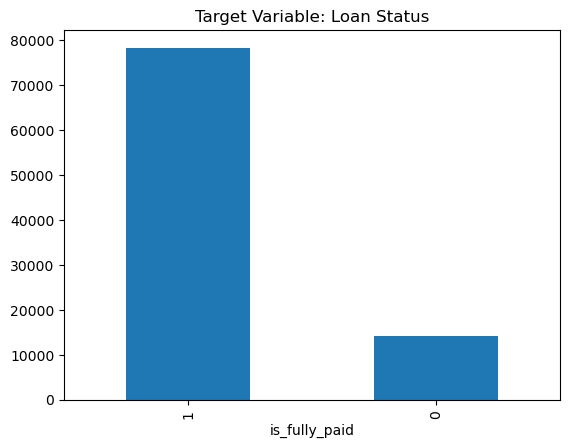

In [26]:
df['is_fully_paid'].value_counts().plot(kind='bar', title='Target Variable: Loan Status')

### Correlation Heatmap

In [ ]:
import matplotlib.pyplot as plt

# Top 20 most correlated features with target
top_corr = df.corr()['is_fully_paid'].abs().sort_values(ascending=False)[1:21]

# Plot bar chart
plt.figure(figsize=(10, 8))
top_corr.plot(kind='barh', color='steelblue')
plt.title('Top 20 Features Correlated with Loan Status')
plt.xlabel('Correlation with is_fully_paid')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# Get column names of top correlated features
top_corr_features = top_corr.index

# Draw heatmap for these features
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top 20 Features')
plt.show()


### Correlation Analysis

To identify the most predictive features, we analyzed the correlation of all variables with the target `is_fully_paid`.

- The top correlated features include `int_rate`, `term`, `installment`, and `loan_amnt`.
- These features have a moderate to strong relationship with loan status and are likely to influence model performance.
- Features with high multicollinearity were noted for potential dimensionality reduction in future work.

## Exploratory Data Analysis: Key Insights

1. **Target Distribution**
The target variable `is_fully_paid` is imbalanced: the majority of loans are fully paid, while a smaller portion are charged off. This should be considered in model evaluation (e.g., using F1-score or recall).

2. **Interest Rate vs Loan Status**
Charged off loans tend to have higher interest rates. This suggests that higher risk borrowers (with higher rates) are more likely to default.

3. **Annual Income**
Borrowers with lower annual income are more likely to have charged off loans, although income alone is not a perfect predictor.

4. **Home Ownership**
Most borrowers are renters or have mortgages. Charged off loans occur across all ownership types, but are more frequent among renters.

5. **Loan Term**
Loans with longer terms (60 months) have a higher proportion of charged off outcomes compared to 36-month loans.